In [ ]:
# Example of face detection with a vggface2 model
import tensorflow
# import tensorflow as tf
# import tensorflow.keras as keras
from keras.models import Model
from tensorflow import keras
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
# from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
# from tensorflow.keras.layers import Layer, InputSpec
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
import tensorflow

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('images.jpeg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 104ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 185ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
165439116/165439116 [==============================] - 8s 0us/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1346516/1346516 [==============================] - 0s 0us/step
b' Sharon_Stone': 96.841%
b' Emma_Atkins': 1.022%
b' Tatyana_Kotova': 0.336%
b' Silke_Bodenbender': 0.275%
b' Noelle_Reno': 0.189%


In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 22.1 MB/s eta 0:00:00


In [ ]:
import os

def get_all_images_in_class(dataset_path, class_name):
    """
    Returns a list of paths to all the images in the specified class of the dataset.
    Args:
        dataset_path: str, the path to the dataset folder
        class_name: str, the name of the class to extract images from
    Returns:
        A list of strings, each string representing the path to an image in the class
    """
    class_path = os.path.join(dataset_path, class_name)  # get the path to the class folder
    image_paths = [os.path.join(class_path, f) for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]  # get the paths to all the images in the class
    return image_paths


In [ ]:
import numpy as np
from keras.models import Model
from keras.preprocessing import image
from keras_vggface.vggface import VGGFace
import os
from PIL import Image
# from keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained VGG-Face model
vgg_model = VGGFace(model='vgg16')

# Define the input shape for the model
input_shape = (224, 224, 3)

# Define the layer just before the classification layer
output_layer = 'fc7/relu'
model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer(output_layer).output)
# Define the number of classes
num_classes = 5

# Initialize an empty array to hold the feature vectors of all the images in each class
feature_vectors = [[] for i in range(num_classes)]
folder_path = "archiv"
centroids=[]
# Get a list of folder names in the folder
folder_names = next(os.walk(folder_path))[1]
# Loop over all the images in each class
for class_index in range(num_classes):
    # Load all the images in the current class
    # Here, you would load the images from your dataset or directory
    # For example:
    image_paths = get_all_images_in_class(folder_path,folder_names[class_index])
    images = [Image.open(image_path).resize((224, 224)) for image_path in image_paths]
    images = [np.array(img) for img in images]
    
    # Extract the feature vectors of all the images in the current class
    for img in images:
        img = np.expand_dims(img, axis=0)
        features = model.predict(img)
        feature_vectors[class_index].append(features)
    
    # Compute the centroid feature vector for the current class
    centroid = np.mean(feature_vectors[class_index], axis=0)
    centroids.append(centroid[0])
centroids=np.array(centroids)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


1/1 [==============================] - 0s 20ms/step


In [ ]:
print(np.sum(centroid[0]))
print(feature_vectors[0][0][0])
print(yhat)

3507.6157
[0. 0. 0. ... 0. 0. 0.]
[[2.85886177e-08 1.05278474e-07 2.77051804e-08 ... 4.59494451e-08
  1.36984832e-08 4.82666032e-08]]


In [ ]:
import tensorflow
# import tensorflow as tf
# import tensorflow.keras as keras
from keras.models import Model
from tensorflow import keras
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
# from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
# from tensorflow.keras.layers import Layer, InputSpec
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
import tensorflow

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
# images = Image.open('images.jpeg').resize((224, 224))
# img = np.array(images)
pixels = extract_face('images.jpeg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='vgg16')
model = Model(inputs=model.input, outputs=model.get_layer(output_layer).output)
# perform prediction
# img = np.expand_dims(img, axis=0)

yhat = model.predict(samples)
# convert prediction into names
# results = decode_predictions(yhat)
# # display most likely results
# for result in results[0]:
# 	print('%s: %.3f%%' % (result[0], result[1]*100))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 20ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 109ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 132ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 158ms/step


In [ ]:
print(len(centroids))

5


In [ ]:

# vectors = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

# Compute the pairwise L2 distance matrix
print(centroids.shape,len(yhat))
distances = np.sum((centroids - yhat[0]) ** 2, axis=1)
print(len(distances))
# Find the maximum distance value and its indices
indi = np.argmax(distances)
print(indi)
# max_indices = np.unravel_index(np.argmax(distances), distances.shape)

# # Determine the index of the vector farthest from the others
# if max_indices[0] == max_indices[1]:
#     farthest_index = max_indices[0]  # in case the two vectors that give the max distance are the same
# else:
#     farthest_index = max_indices[np.argmax(distances[max_indices[0], max_indices[1:]]) + 1]

# print("The vector farthest from the others is at index:", farthest_index)


(5, 4096) 1
5
4


In [ ]:
import numpy as np
import tensorflow as tf
from keras.applications import VGG16
from PIL import Image
from skimage.metrics import structural_similarity as ssim

# Load the pre-trained VGG16 model (used to extract feature vectors)
model = VGG16(weights='imagenet', include_top=False)

# Load the target and source images
target_image = Image.open('images.jpeg').resize((224, 224))
source_image = Image.open(image_paths[0]).resize((224, 224))

# Convert the images to arrays
target_array = np.array(target_image)
source_array = np.array(source_image)

# Reshape the arrays to have a batch dimension (needed for the model)
target_array = np.expand_dims(target_array, axis=0)
source_array = np.expand_dims(source_array, axis=0)

# Use the model to extract feature vectors from the source and target images
source_features = model.predict(source_array)
target_features = model.predict(target_array)

# Define a loss function that encourages the generated image to have similar features to the source image
def feature_loss(y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

# Define a loss function that encourages the generated image to have low structural similarity (DSSIM) with the original image
def dssim_loss(y_true, y_pred):
    original_image = tf.image.convert_image_dtype(y_true, tf.float32)
    generated_image = tf.image.convert_image_dtype(y_pred, tf.float32)
    print(original_image.shape, generated_image.shape)
    return tf.image.ssim(original_image, generated_image, max_val=255)

# Define a combined loss function that balances the feature and DSSIM losses
def total_loss(y_true, y_pred):
    print(y_true.shape,y_pred.shape)
    return 0.5 * feature_loss(y_true, y_pred) + 0.5 * dssim_loss(y_true, y_pred)

# Define an optimizer and compile the model
optimizer = tf.optimizers.Adam(learning_rate=0.01, beta_1=0.99, epsilon=1e-1)
model.compile(optimizer=optimizer, loss=total_loss)

# Initialize the generated image with random noise
generated_image = np.random.uniform(0, 255, size=(1, 224, 224, 3))

# Define the stopping condition
dssim_threshold = 0.007

# Run the optimization process to generate the cloaked image
for i in range(1000):
    # Compute the loss between the generated image and the source image's feature vector and original image
    loss = total_loss(target_features, model(generated_image))

    # Compute the gradients of the loss with respect to the generated image
    gradients = tf.GradientTape().gradient(loss, generated_image)

    # Update the generated image using the gradients and the optimizer
    optimizer.apply_gradients(zip(gradients, generated_image))
    generated_image = np.clip(generated_image, 0, 255)

    # Compute the structural similarity index between the original and generated images
    original_image = np.array(target_image).astype('float32')
    generated_image = generated_image[0].astype('float32')
    dssim_value = ssim(original_image, generated_image, multichannel=True)

    # If the DSSIM value is below the threshold, save and stop the optimization
    if dssim_value < dssim_threshold or i==999:
        cloaked_image = tf.image.convert_image_dtype(generated_image, tf.uint8)
        cloaked_image = Image.fromarray(cloaked_image)
        cloaked_image.save('cloak.jpg')


58889256/58889256 [==============================] - 3s 0us/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 24ms/step
(1, 7, 7, 512) (1, 7, 7, 512)
(1, 7, 7, 512) (1, 7, 7, 512)


InvalidArgumentError: ignored

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torchvision.transforms import ToTensor, ToPILImage
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import tensorflow as tf

def generate_cloak(target_path, source_path, num_epochs=2000, alpha=0.01, beta=10):
    target = Image.open(target_path).convert('RGB').resize((224,224))
    source = Image.open(source_path).convert('RGB').resize((224,224))
    target=np.array(target)
    source=np.array(source)
    print(target.shape)
    target_tensor = Variable(ToTensor()(target)).unsqueeze(0)
    source_tensor = Variable(ToTensor()(source)).unsqueeze(0)
    target_tensor = target_tensor.permute(0,2, 3, 1)
    source_tensor = source_tensor.permute(0,2,3,1)
    print( target_tensor.shape)
    input_tensor = target_tensor.clone()
    input_tensor.requires_grad = True
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam([input_tensor.requires_grad_()], lr=alpha)
    model = VGGFace(model='vgg16')
    output_layer='fc7/relu'
    model = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer(output_layer).output)
    # in_f=yhat[0]
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        
        output_tensor = input_tensor.clone()
        # in_f=model.predict(output_tensor)
        # Compute the DSSIM loss
        dssim_loss = 1 - ssim(output_tensor.detach().cpu().numpy()[0], target_tensor.detach().cpu().numpy()[0],win_size=3, multichannel=True)
        o_t = output_tensor.detach().cpu().numpy()
        # print(o_t.shape)
        # model = VGGFace(model='vgg16')
        in_f=model.predict(o_t)
        # print(in_f.shape)
        # Compute the MSE loss
        mse_loss = criterion(output_tensor, source_tensor)
        
        # Combine the losses
        total_loss = mse_loss+np.linalg.norm(feature_vectors[3][0][0]-in_f[0]) + beta *max(abs(dssim_loss)-0.007,0)
        # total_loss = torch.tensor([total_loss], requires_grad=True)
        
        total_loss.backward()
        print(total_loss)
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print("Epoch [{}/{}], Total Loss: {:.4f}, MSE Loss: {:.4f}, DSSIM Loss: {:.4f}"
                  .format(epoch+1, num_epochs, total_loss.item(), mse_loss.item(), dssim_loss))
    input_tensor = input_tensor.permute(0,3,1,2)
    output = ToPILImage()(input_tensor.data.squeeze().cpu().clamp(0, 1))
    
    return output

image_paths = get_all_images_in_class(folder_path,folder_names[3])
output=generate_cloak('images.jpeg',image_paths[0])

(224, 224, 3)
torch.Size([1, 224, 224, 3])


<ipython-input-34-7a6039218ff0>:36: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  dssim_loss = 1 - ssim(output_tensor.detach().cpu().numpy()[0], target_tensor.detach().cpu().numpy()[0],win_size=3, multichannel=True)
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 145ms/step
tensor(169.6871, grad_fn=<AddBackward0>)
1/1 [==============================] - 0s 19ms/step
tensor(169.6814, grad_fn=<AddBackward0>)
1/1 [==============================] - 0s 20ms/step
tensor(169.6855, grad_fn=<AddBackward0>)
1/1 [==============================] - 0s 19ms/step
tensor(169.7663, grad_fn=<AddBackward0>)
1/1 [==============================] - 0s 20ms/step
tensor(169.8677, grad_fn=<AddBackward0>)
1/1 [==============================] - 0s 20ms/step
tensor(169.9839, grad_fn=<AddBackward0>)
1/1 [==============================] - 0s 21ms/step
tensor(170.1089, grad_fn=<AddBackward0>)
1/1 [

In [ ]:
output.save('images2.jpg')

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import numpy as np
from skimage.metrics import structural_similarity as ssim
from PIL import Image

# Define the device to run the code on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the source and target images
source_img_path = "images.jpeg"
target_img_path = image_paths[5]

# Load the source and target images
source_img = Image.open(source_img_path).convert("RGB").resize((224,224))
target_img = Image.open(target_img_path).convert("RGB").resize((224,224))

# Define the pre-trained feature extraction network
vgg = models.vgg19(pretrained=True).features.to(device).eval()

# Define the hyperparameters for the optimization
learning_rate = 0.1
num_iterations = 10000
lamda=10000
# Define the initial cloaked image as the source image
cloaked_img = torch.FloatTensor(np.array(source_img)).permute(2, 0, 1).unsqueeze(0).to(device)
cloaked_img.requires_grad = True

# Define the optimization function and optimizer
optimizer = torch.optim.Adam([cloaked_img], lr=learning_rate)
criterion = torch.nn.MSELoss()

# Start the optimization loop
for i in range(num_iterations):
    
    # Forward pass the cloaked image through the feature extraction network and extract the features
    cloaked_features = vgg(cloaked_img)
    
    # Forward pass the target image through the feature extraction network and extract the features
    target_features = vgg(torch.FloatTensor(np.array(target_img)).permute(2, 0, 1).unsqueeze(0).to(device))
    
    # Compute the loss between the cloaked features and the target features
    # loss = criterion(cloaked_features, target_features)
    
    # Compute the DSSIM between the cloaked image and the source image
    cloaked_img_np = cloaked_img.squeeze(0).detach().permute(1, 2, 0).cpu().numpy()
    source_img_np = np.array(source_img)
    dssim_value = 1-ssim(cloaked_img_np, source_img_np, multichannel=True, data_range=cloaked_img_np.max() - cloaked_img_np.min())
    loss = criterion(cloaked_features, target_features)+lamda*max(0,abs(dssim_value)-0.007)
    # Backward pass and optimize the cloaked image
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss and DSSIM every 50 iterations
    if (i + 1) % 100 == 0:
        print("Iteration:", i + 1, "Loss:", loss.item(), "DSSIM:", dssim_value)
    
    # Stop the optimization if the DSSIM is less than 0.007
    # if dssim_value < 0.007:
    #     break

# Save the cloaked image
cloaked_img_np = cloaked_img.squeeze(0).detach().permute(1, 2, 0).cpu().numpy()
cloaked_img_pil = Image.fromarray(np.uint8(np.clip(cloaked_img_np, 0, 255)))
cloaked_img_pil.save("cloaked_img.jpg")


<ipython-input-40-fbdf17fa0867>:49: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  dssim_value = 1-ssim(cloaked_img_np, source_img_np, multichannel=True, data_range=cloaked_img_np.max() - cloaked_img_np.min())


Iteration: 100 Loss: 268.38690185546875 DSSIM: 0.027494370937347412
Iteration: 200 Loss: 427.5356750488281 DSSIM: 0.04632300138473511
Iteration: 300 Loss: 560.7879638671875 DSSIM: 0.06075620651245117
Iteration: 400 Loss: 687.5442504882812 DSSIM: 0.07402729988098145
Iteration: 500 Loss: 802.3289794921875 DSSIM: 0.08589386940002441
Iteration: 600 Loss: 900.295166015625 DSSIM: 0.09595614671707153
Iteration: 700 Loss: 968.478271484375 DSSIM: 0.10294753313064575
Iteration: 800 Loss: 1044.34716796875 DSSIM: 0.11066412925720215
Iteration: 900 Loss: 1111.8128662109375 DSSIM: 0.11750191450119019
Iteration: 1000 Loss: 1172.631591796875 DSSIM: 0.12365418672561646
Iteration: 1100 Loss: 1227.6685791015625 DSSIM: 0.1292133927345276
Iteration: 1200 Loss: 1282.1783447265625 DSSIM: 0.13471078872680664
Iteration: 1300 Loss: 1337.4891357421875 DSSIM: 0.14028483629226685
Iteration: 1400 Loss: 1381.044677734375 DSSIM: 0.14467984437942505
Iteration: 1500 Loss: 1415.991943359375 DSSIM: 0.1482108235359192
Ite

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.preprocessing import image
from scipy.optimize import minimize

# Load VGGFace model
vgg_model = VGGFace(model='vgg16', weights='vggface', include_top=False)

# Load source and target images
src_img_path = 'images.jpeg'
target_img_path = image_paths[0]

src_img = cv2.imread(src_img_path)
src_img = cv2.resize(src_img, (224, 224))

target_img = cv2.imread(target_img_path)
target_img = cv2.resize(target_img, (224, 224))

# Define the loss function
def loss_fn(x, vgg_model, target_features):
    """
    Calculates the loss between the source image and the target image feature vectors
    """
    x = x.reshape((1, 224, 224, 3))
    x = preprocess_input(x) # use default version of preprocess_input for VGG16
    features = vgg_model.predict(x)
    target_features=target_features.detach().cpu().numpy()
    features=features.reshape((1,512,7,7))
    l2_loss = np.mean(np.square(features - target_features))
    return l2_loss

# Define the callback function to print loss
def callback(xk):
    """
    Callback function to print loss
    """
    print('Loss:', loss_fn(xk, vgg_model, target_features))

# Generate cloaked image using optimization
x0 = np.random.randn(224 * 224 * 3)
bounds = [(0, 255)] * len(x0)
res = minimize(loss_fn, x0, method='L-BFGS-B', args=(vgg_model, target_features), bounds=bounds, callback=callback)

# Save the cloaked image
cloaked_img = res.x.reshape((224, 224, 3))
cloaked_img = preprocess_input(np.expand_dims(cloaked_img, axis=0))
cloaked_img = np.clip(cloaked_img, 0, 255)
cloaked_img = np.uint8(cloaked_img)[0]
cloaked_img = cv2.cvtColor(cloaked_img, cv2.COLOR_BGR2RGB)
cv2.imwrite('cloaked_image.jpg', cloaked_img)



58909280/58909280 [==============================] - 4s 0us/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 9s 9s/step


In [ ]:
image_paths = get_all_images_in_class(folder_path,folder_names[3])


AxesImage(size=(224, 224))


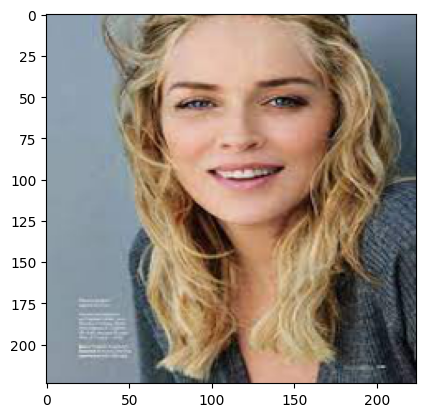

In [ ]:
import matplotlib.pyplot as plt
print(plt.imshow(output))
output.save('modified.jpg')
# print(plt.imshow(image_paths[0]))

In [ ]:
# Example of face detection with a vggface2 model
import tensorflow
# import tensorflow as tf
# import tensorflow.keras as keras
from keras.models import Model
from tensorflow import keras
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
# from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
# from tensorflow.keras.layers import Layer, InputSpec
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions
import tensorflow

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# load the photo and extract the face
pixels = extract_face('cloaked_img.jpg')
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 17ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2/2 [==============================] - 0s 88ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 252ms/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 1s 1s/step
b' Sharon_Stone': 92.939%
b' Noelle_Reno': 1.148%
b' Emma_Atkins': 0.984%
b' Silke_Bodenbender': 0.584%
b' Line_Verndal': 0.383%


In [ ]:
def preprocess(X, method):
    assert method in {'raw', 'imagenet', 'inception', 'mnist'}

    if method == 'raw':
        pass
    elif method == 'imagenet':
        X = imagenet_preprocessing(X)
    else:
        raise Exception('unknown method %s' % method)

    return X


def reverse_preprocess(X, method):
    assert method in {'raw', 'imagenet', 'inception', 'mnist'}

    if method == 'raw':
        pass
    elif method == 'imagenet':
        X = imagenet_reverse_preprocessing(X)
    else:
        raise Exception('unknown method %s' % method)

    return X


def imagenet_preprocessing(x, data_format=None):
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in ('channels_last', 'channels_first')

    x = np.array(x)
    if data_format == 'channels_first':
        # 'RGB'->'BGR'
        if x.ndim == 3:
            x = x[::-1, ...]
        else:
            x = x[:, ::-1, ...]
    else:
        # 'RGB'->'BGR'
        x = x[..., ::-1]

    mean = [103.939, 116.779, 123.68]
    std = None

    # Zero-center by mean pixel
    if data_format == 'channels_first':
        if x.ndim == 3:
            x[0, :, :] -= mean[0]
            x[1, :, :] -= mean[1]
            x[2, :, :] -= mean[2]
            if std is not None:
                x[0, :, :] /= std[0]
                x[1, :, :] /= std[1]
                x[2, :, :] /= std[2]
        else:
            x[:, 0, :, :] -= mean[0]
            x[:, 1, :, :] -= mean[1]
            x[:, 2, :, :] -= mean[2]
            if std is not None:
                x[:, 0, :, :] /= std[0]
                x[:, 1, :, :] /= std[1]
                x[:, 2, :, :] /= std[2]
    else:
        x[..., 0] -= mean[0]
        x[..., 1] -= mean[1]
        x[..., 2] -= mean[2]
        if std is not None:
            x[..., 0] /= std[0]
            x[..., 1] /= std[1]
            x[..., 2] /= std[2]

    return x


def imagenet_reverse_preprocessing(x, data_format=None):
    import keras.backend as K
    x = np.array(x)
    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in ('channels_last', 'channels_first')

    if data_format == 'channels_first':
        if x.ndim == 3:
            # Zero-center by mean pixel
            x[0, :, :] += 103.939
            x[1, :, :] += 116.779
            x[2, :, :] += 123.68
            # 'BGR'->'RGB'
            x = x[::-1, :, :]
        else:
            x[:, 0, :, :] += 103.939
            x[:, 1, :, :] += 116.779
            x[:, 2, :, :] += 123.68
            x = x[:, ::-1, :, :]
    else:
        # Zero-center by mean pixel
        x[..., 0] += 103.939
        x[..., 1] += 116.779
        x[..., 2] += 123.68
        # 'BGR'->'RGB'
        x = x[..., ::-1]
    return x


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of archive.zip or
        archive.zip.zip, and cannot find archive.zip.ZIP, period.


In [ ]:
!pip uninstall numpy
!pip install numpy==1.19.5

Found existing installation: numpy 1.24.2
Uninstalling numpy-1.24.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.9
    /usr/local/lib/python3.9/dist-packages/numpy-1.24.2.dist-info/*
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libopenblas64_p-r0-15028c96.3.21.so
    /usr/local/lib/python3.9/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.9/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.24.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.19.5-cp39-cp39-manylinux2010_x86_64.whl (14.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 2022.12.0 requires numpy>=1.20, but you have numpy 

In [ ]:
# !pip install tensorflow==2.7.0
!pip install keras==2.0.8
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.1/276.1 KB 17.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.0.8 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 KB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h5py: filename=h5py-2.10.0-cp39-cp39-linux_x86_64.whl size=5731640 sha256=a3a68a9db3a094a828c14b07cdda20f0a9e3ad5cedb0db62c9a93d6e137f85fe
  Stored in direct

In [ ]:
!pip install keras-vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# %%capture
!kaggle datasets download -d greatgamedota/vggface2-test
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle
!mkdir archiv
!unzip vggface2-test.zip -d archiv

Streaming output truncated to the last 5000 lines.
  inflating: archiv/n009114/0173_01.jpg  
  inflating: archiv/n009114/0174_01.jpg  
  inflating: archiv/n009114/0176_01.jpg  
  inflating: archiv/n009114/0179_01.jpg  
  inflating: archiv/n009114/0180_01.jpg  
  inflating: archiv/n009114/0181_01.jpg  
  inflating: archiv/n009114/0183_03.jpg  
  inflating: archiv/n009114/0192_01.jpg  
  inflating: archiv/n009114/0194_01.jpg  
  inflating: archiv/n009114/0195_01.jpg  
  inflating: archiv/n009114/0208_01.jpg  
  inflating: archiv/n009114/0211_02.jpg  
  inflating: archiv/n009114/0212_01.jpg  
  inflating: archiv/n009114/0222_02.jpg  
  inflating: archiv/n009114/0222_03.jpg  
  inflating: archiv/n009114/0223_02.jpg  
  inflating: archiv/n009114/0225_01.jpg  
  inflating: archiv/n009114/0227_01.jpg  
  inflating: archiv/n009114/0228_01.jpg  
  inflating: archiv/n009114/0237_01.jpg  
  inflating: archiv/n009114/0238_02.jpg  
  inflating: archiv/n009114/0259_04.jpg  
  inflating: archiv/n0091